# K-Means Clustering

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [7]:
np.random.seed(42)

X, _ = make_blobs(n_samples=300 , centers=3, cluster_std=0.6, random_state=42)
scaler = StandardScaler()

#underscore ko meaning chai make_blobs() le 2 ta value return 
#gareko cha & we are ignoring 2nd value

X_scaled = scaler.fit_transform(X)

print(X_scaled[0:5])


#n_init le chai fastest centroid converse huncha

[[-1.1556965  -1.33355203]
 [-1.20564162 -1.29101262]
 [-0.0889342   1.05445939]
 [ 1.26537302  0.19363283]
 [-1.35230803 -1.34801943]]


In [6]:
kmeans = KMeans(n_clusters=3 , init="k-means++" , n_init=10 , random_state=42)
kmeans.fit(X_scaled)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_
wcss = kmeans.inertia_

print("Labels : ", labels)
print("Centroids:" , centroids)
print("WCSS : ",wcss)

Labels :  [1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]
Centroids: [[-0.20681666  1.1687533 ]
 [-1.09901854 -1.26535113]
 [ 1.30583519  0.09659783]]
WCSS :  6.775066760799562


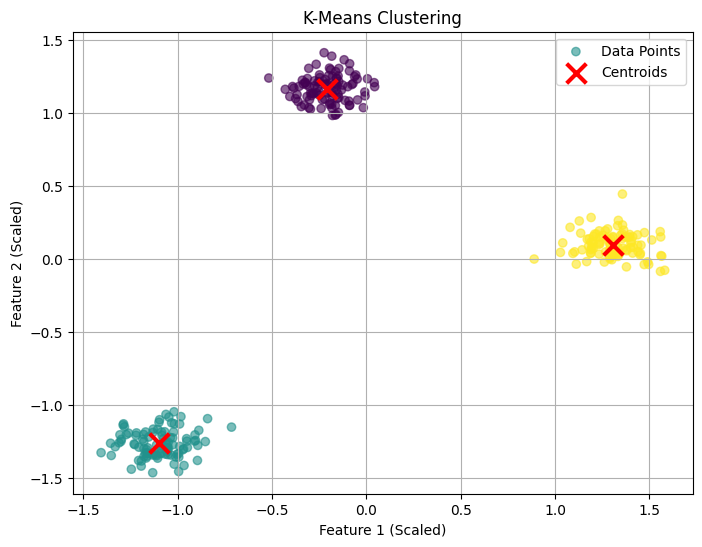

In [10]:
plt.figure(figsize=(8,6))
plt.scatter(X_scaled[:,0] , X_scaled[:,1], c=labels, cmap = "viridis", alpha=0.6, label="Data Points")
plt.scatter(centroids[:,0], centroids[:,1], c="red", marker="x", s=200, linewidth=3, label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel("Feature 1 (Scaled)")
plt.ylabel("Feature 2 (Scaled)")
plt.legend()
plt.grid(True)
plt.savefig("kmeans-clustering.png")
plt.show()

In [12]:
wcss_values = []

k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init="k-means++", n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss_values.append(kmeans.inertia_)

print("The WCSS values are:", wcss_values)


The WCSS values are: [600.0, 178.65671614695478, 6.775066760799562, 5.728614673478412, 4.7072986948409525, 3.954452054683772, 3.5066406056003068, 3.1018183843954996, 2.7402459540413, 2.507097456538773]


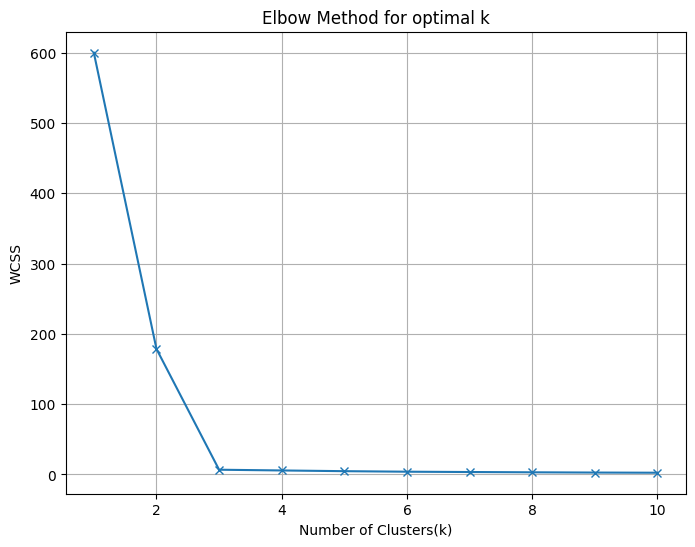

In [16]:
plt.figure(figsize=(8,6))
plt.plot(k_values , wcss_values , marker="x")
plt.title("Elbow Method for optimal k")
plt.xlabel("Number of Clusters(k)")
plt.ylabel("WCSS")
plt.grid(True)
plt.savefig("elbow-plot.png")
plt.show()